<a href="https://colab.research.google.com/github/jenyquist/geophysics_class/blob/main/Colab_gravity_corrections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gravity Corrections
In the folder with this notebook you will find a file named "grav_data.dat".
The format of the file is three data columns.  The first column is the station location along the line in meters.
The second is the elevation of the measurement point in meters.  The third is the gravity reading in gravity units with the minimum gravity value subtracted (i.e.it is the residual gravity). This file represents a gravity profile over a buried sphere, but the profile was not made on a flat surface, so the data has been distorted by elevation.

You can work with each other to figure this one out. I will get you started

In [1]:
# Load the modules needed and set plotting in the notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Getting data into Colab
If you are running this notebook using Google Colab, you are running on a maching in the cloud that does not have access to your local data files. So you will first have to upload the data to the virtual machine. We do  this in the next code cell. Note: you will have to do this every time you run this notebook in a new Colab session. Your data files are not permenently stored. A new virtual machine is created each time.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving grav_data.dat to grav_data.dat


In [3]:
# Read the data into a numpy array
file_name = "grav_data.dat"
data = np.loadtxt(file_name)

In [4]:
# Display the number of rows and columns
data.shape

(81, 3)

In [5]:
# Parse the numpy array into column vectors
x = data[:,0]
elev = data[:,1]
grav = data[:,2]

Text(0, 0.5, 'Raw Gravity (G.U.)')

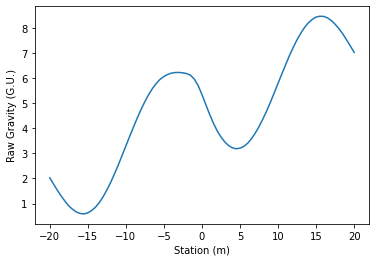

In [6]:
# Plot the raw gravity data versus station location along the measurement line
fig, ax = plt.subplots()
ax.plot(x, grav)
ax.set_xlabel("Station (m)")
ax.set_ylabel("Raw Gravity (G.U.)")

Text(0, 0.5, 'Elevation (m)')

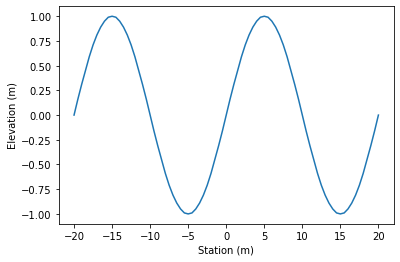

In [7]:
# Plot the topography
fig, ax = plt.subplots()
ax.plot(x, elev)
ax.set_xlabel("Station (m)")
ax.set_ylabel("Elevation (m)")

### It is clear that the raw gravity data is dominated by topography and instrument drift.

You will need to make free air and bouguer corrections before you can interpret it.  Furthermore, the 
gravity meter drifted by +0.5 g.u. over the survey (assume an equal time between measurements), so 
you'll also have to make a drift correction.  Your task is to make the necessary corrections to 
the data, then estimate the mass and depth of the source. Write a summary of your calculations, 
including a plot of the corrected and uncorrected gravity data on the same graph along with your model fit. 

Here are the necessary steps:
1. Correct for drift
2. Free-air elevation correction
3. Bouguer elevation correction
4. Fit the anomaly
5. Plot the data and fitted model

#### Step 1: Drift Correction
We are told the instrument gained +0.5 g.u. over the course of the survey. To remove this drift we need to subtract an amount that increases linearly from 0 to 0.5 across the 81 measurements made. The equation for a straight line is:

$$ y = mx + b$$

Where $m = \Delta y/ \Delta x$ and b is the y-intercept.

To do the drift correction, figure out m and b, then
calculate y and subtract it from grav. Edit the code cell below to do this.

In [8]:
m = 0.5/(x[-1] - x[0])
b = 0.25
y = m * x + b
grav_nodrift = grav - y

Enter code in the cell below to plot the drift-corrected gravity data.

#### Step 2: Free-Air Correction
If you've correctly removed the drift, the plot should no longer trend upward, but will still be dominated by the sinusoidal topography.

Next you need to perform the free air correction. 

$$ g_F = g_{obs} + \delta g_F$$

In other words, we add a correction factor that increases the values for high elevations to compensate for the weakening of gravity with distance from the center of the earth. 

This correction factor is about 3.086 g.u./meter. So the formula you need to program is:

g_free_air = grav_nodrift + elev * 3.083

Note, python will always do multiplication before addition, so you don't need to write

g_free_air = grav_nodrift + (elev * 3.083)

although that works too.  You can see the full table of python operator precedence [here](http://www.mathcs.emory.edu/~valerie/courses/fall10/155/resources/op_precedence.html).

Perform the free air correction and plot the result.

#### Step 3: Bouguer Correction
The effect of topography is less, and an an anomaly is started to emerge, but topography is still dominant. You've corrected for change in gravitational attraction caused by the rock layer between the measured elevation and the common height to which you are correcting the data.

Correcting for this rock layer is the Bouguer correction, and requires you assume a density for the rock (unless you know what it is). Typically, the rock density of 2670 $kg/m^3$ is used, which gives a correction of -1.119 g.u./meter.

g_bouguer = g_free_air - 1.119 * elev

If you perform drift, free-air and bouguer corretions correctly, your gravity graph should look like this:
![Bouguer anomaly](https://i.postimg.cc/xTsLWmRv/Screen-Shot-2019-07-18-at-3-50-11-PM.png)

The anomaly from created by a locate source is now clearly visible. Before it was totally obscured by the drift and topography. But the gravity value away from the peak does not fall to zero. There is some sort of regional background, possibly caused by larger, deeper structures. 

To correct for this, substract the background

g_anomaly = g_bouguer - 2

#### Step 4: Fit the Anomaly
Now you need to fit a model to the data. There are sophisticated optimization routines that will do this. But this early in the class, you will simply adjust the parameters mass (m), x-location (x0) and depth (y0) of the point source to achieve the fit.

Assuming you named your corrected gravity data grav_bouguer, you can run the code cell below, adjusting the parameters until you are satisfied with the fit.

In [ ]:
# Model parameters (x0,y0) are the point mass coordinates
m = 7e4 
x0 = 0
y0 = 3

# Fitting code
G = 6.67e-11
r = np.sqrt((x-x0)**2 + y0**2);
g_fit = 1e6 * G * m / r**2  # Note the 1e6 multiplier to put the result in gravity units.

fig, ax = plt.subplots()
ax.plot(x, g_anomaly)
ax.plot(x, g_fit)
ax.set_xlabel("Station (m)")
ax.set_ylabel("Bouguer Gravity (m)")

#### So, what's your best estimate of the source parameters for the gravity anomaly? How does your answer compare with other students' results?